In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("data/annual-co2-emissions-by-region.csv")

#Drop Code column
df.drop("Code",axis = 1, inplace = True)

#Rename columns
df.columns = ["Country","Year","Annual CO2 emissions"]

#Convert tonnes to Giga tonnes
df["Annual CO2 emissions"] = df["Annual CO2 emissions"]/10**9

df

,Country,Year,Annual CO2 emissions
0,Afghanistan,1750,0.000000
1,Afghanistan,1751,0.000000
2,Afghanistan,1752,0.000000
3,Afghanistan,1753,0.000000
4,Afghanistan,1754,0.000000
...,...,...,...
64255,Zimbabwe,2015,0.012170
64256,Zimbabwe,2016,0.010815
64257,Zimbabwe,2017,0.010247
64258,Zimbabwe,2018,0.011341


In [3]:
df = pd.pivot_table(df, index = "Country", columns = "Year").T

#Retain only Years as Index
df.index = df.index.get_level_values(1)

df

Country,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia,Asia (excl. China & India),Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Christmas Island,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,EU-27,EU-28,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Europe,Europe (excl. EU-27),Europe (excl. EU-28),Faeroe Islands,Fiji,Finland,France,French Equatorial Africa,French Polynesia,French West Africa,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Greenland,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International transport,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kuwaiti Oil Fires,Kyrgyzstan,Laos,Latvia,Lebanon,Leeward Islands,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Moldova,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,North America,North America (excl. USA),North Korea,North Macedonia,Norway,Oceania,Oman,Pakistan,Palau,Palestine,Panama,Panama Canal Zone,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Ryukyu Islands,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Korea,South Sudan,Spain,Sri Lanka,St. Kitts-Nevis-Anguilla,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009351,0.009351,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [4]:
df = df.loc[1800:]

In [5]:
df2 = df.copy()

#Retaining emissions values of top 5 countries
df2 = df2[["China","EU-27","India","Russia","United States","World"]]

#Calculate emissions from rest of the world
df2.insert(5, "Rest of world",df["World"] - (df["China"] + df["EU-27"] + df["India"] + df["Russia"] + df["United States"]))

#Drop World
df2.drop("World",axis = 1, inplace = True)

df2

Country,China,EU-27,India,Russia,United States,Rest of world
Year,,,,,,
1800,0.000000,0.001202,0.000000,0.000000,0.000253,0.026637
1801,0.000000,0.000978,0.000000,0.000000,0.000267,0.026714
1802,0.000000,0.009640,0.000000,0.000000,0.000289,0.026853
1803,0.000000,0.000997,0.000000,0.000000,0.000297,0.030195
1804,0.000000,0.003642,0.000000,0.000000,0.000333,0.030334
...,...,...,...,...,...,...
2015,9.683201,3.098969,2.253429,1.622861,5.412432,13.138554
2016,9.552517,3.103516,2.392360,1.618304,5.292268,13.261449
2017,9.750726,3.127499,2.456848,1.646180,5.253606,13.461490


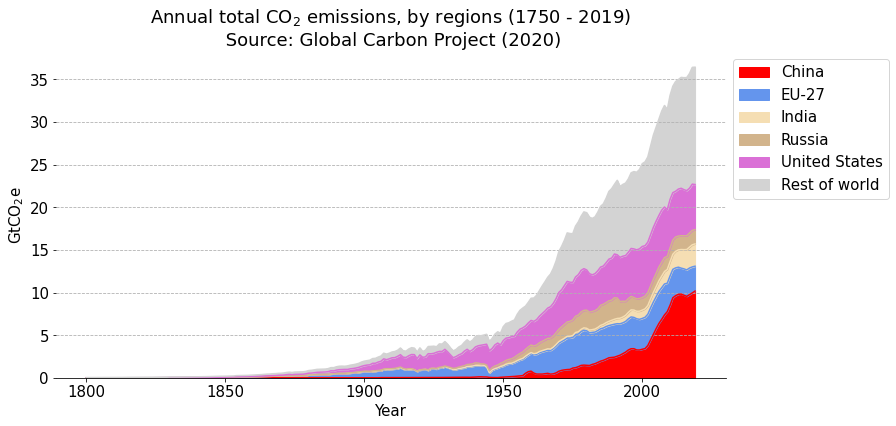

In [6]:
plt.rcParams["font.size"] = 15
fig, ax = plt.subplots(figsize = (12,6))

df2.plot(kind = "area",
         stacked = True,
         color = ["red","cornflowerblue","wheat","tan","orchid","lightgrey"],
         ax = ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines["left"].set_visible(False)

plt.grid(axis = "y", linestyle = "--")
plt.title("Annual total CO$_2$ emissions, by regions (1750 - 2019)\n Source: Global Carbon Project (2020)")
plt.ylabel("GtCO$_2$e")

lgd = plt.legend(bbox_to_anchor = (1,1))
plt.savefig("plots/Historical global emissions by countries.jpeg",
            dpi = 300,
           #bbox_extra_artist = (lgd,),
           bbox_inches = "tight")
plt.show()

In [7]:
#Cumulative emissions
df2.sum()

Country
China            219.985862
EU-27            287.020302
India             51.937016
Russia           113.884449
United States    410.238263
Rest of world    569.101082
dtype: float64

In [8]:
df2.loc[2019]

Country
China            10.174681
EU-27             2.916906
India             2.616449
Russia            1.678367
United States     5.284697
Rest of world    13.770288
Name: 2019, dtype: float64

In [9]:
df2.loc[2019].sum()

36.441387575

In [10]:
df3 = df2.copy()
for index in df3.index:
    row_total = df3.loc[index].sum(axis = 0)
    for column in df3.columns:
        df3.loc[index, column] = df3.loc[index, column]*100/row_total
df3

Country,China,EU-27,India,Russia,United States,Rest of world
Year,,,,,,
1800,0.000000,4.278075,0.000000,0.000000,0.899961,94.821964
1801,0.000000,3.498886,0.000000,0.000000,0.956624,95.544490
1802,0.000000,26.207790,0.000000,0.000000,0.786931,73.005279
1803,0.000000,3.164999,0.000000,0.000000,0.942518,95.892483
1804,0.000000,10.615122,0.000000,0.000000,0.971807,88.413071
...,...,...,...,...,...,...
2015,27.501712,8.801528,6.400069,4.609164,15.372102,37.315424
2016,27.122103,8.811696,6.792538,4.594791,15.026137,37.652736
2017,27.315752,8.761397,6.882630,4.611620,14.717489,37.711113


In [11]:
df3.loc[2019]

Country
China            27.920674
EU-27             8.004377
India             7.179883
Russia            4.605661
United States    14.501908
Rest of world    37.787497
Name: 2019, dtype: float64

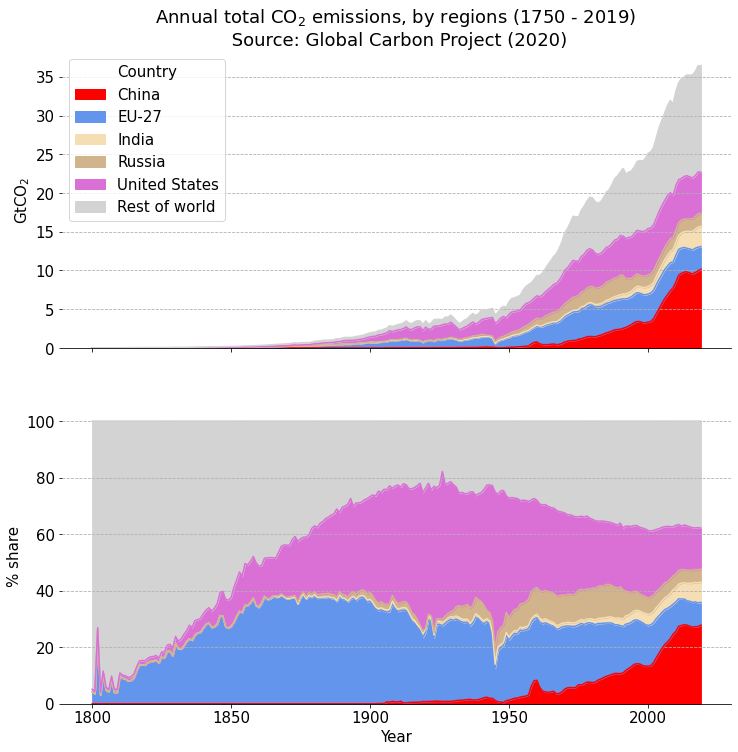

In [12]:
plt.rcParams["font.size"] = 15
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (12,12), sharex = True)

df2.plot(kind = "area",
         stacked = True,
         color = ["red","cornflowerblue","wheat","tan","orchid","lightgrey"],
         ax = ax1)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines["left"].set_visible(False)

ax1.grid(axis = "y", linestyle = "--")

ax1.set_title("Annual total CO$_2$ emissions, by regions (1750 - 2019) \n Source: Global Carbon Project (2020)")
ax1.set_ylabel("GtCO$_2$")


df3.plot(kind = "area",
         stacked = True,
         color = ["red","cornflowerblue","wheat","tan","orchid","lightgrey"],
        ax = ax2)

#ax2.legend([""])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines["left"].set_visible(False)

ax2.grid(axis = "y", linestyle = "--")
ax2.set_ylabel("% share")
ax2.get_legend().remove()

#lgd = plt.legend(bbox_to_anchor = (1,1))
plt.savefig("plots/Historical global emissions by countries.jpeg",
            dpi = 300,
           bbox_inches = "tight")

plt.show()